In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\abhis\Downloads\archive (19)\cirrhosis.csv')
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [3]:
#Q1. A) and Q1. B)
pd.DataFrame(100*(df.isnull().sum()/df.shape[0])).T

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0.0,0.0,0.0,25.358852,0.0,0.0,25.358852,25.358852,25.358852,0.0,0.0,32.057416,0.0,25.837321,25.358852,25.358852,32.535885,2.631579,0.478469,1.435407


<AxesSubplot:>

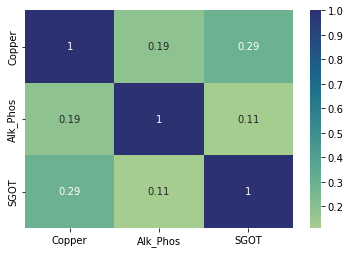

In [4]:
#Q1. C)
sns.heatmap(df[['Drug', 'Ascites', 'Hepatomegaly', 'Spiders', 'Copper', 'Alk_Phos','SGOT']].corr(), annot = True, cmap = 'crest')

In [5]:
# Q2 A) how does platelets count vary with age in males and females? show relaltionship using a visualizations 

In [7]:
df['Age'] = (df['Age'].values/365).round()

In [8]:
df['age_bin']=pd.cut(df['Age'], bins = np.arange(20,90,10))

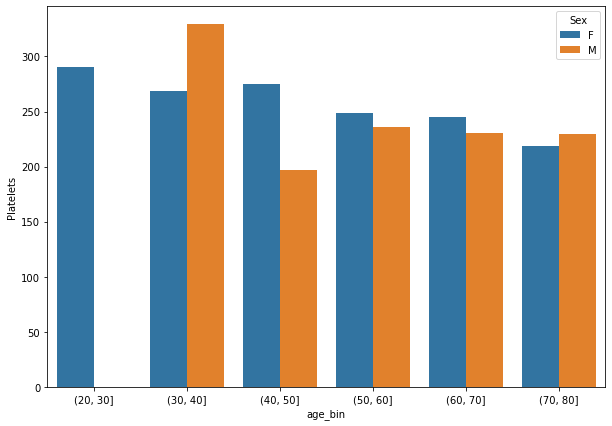

In [9]:
temp = df.groupby(['age_bin','Sex'], as_index = False)['Platelets'].mean()
plt.figure(figsize = (10,7))
sns.barplot(x = temp['age_bin'], y = temp['Platelets'], hue = temp['Sex']);

AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


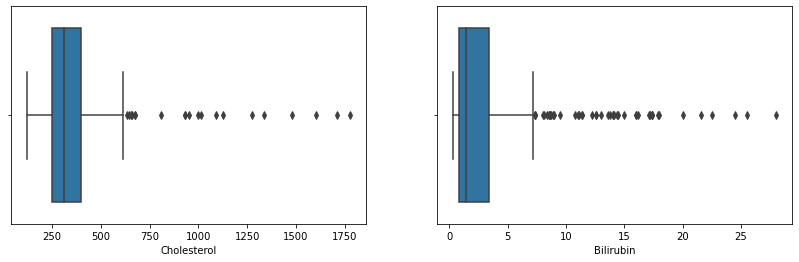

In [10]:
#Q.2 B)
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
print(sns.boxplot(x = df['Cholesterol'], data = df))
plt.subplot(1,2,2)
print(sns.boxplot(x = df['Bilirubin'], data = df))
plt.show();

In [13]:
lc = df['Cholesterol'].quantile(0.25) - 1.5*(df['Cholesterol'].quantile(0.75)-df['Cholesterol'].quantile(0.25))
uc = df['Cholesterol'].quantile(0.75) + 1.5*(df['Cholesterol'].quantile(0.75)-df['Cholesterol'].quantile(0.25))
c = df['Cholesterol']
c = np.where(c>uc, uc, np.where(c<lc, lc, c))
df['Cholesterol'] = pd.DataFrame(c)

In [14]:
lb = df['Bilirubin'].quantile(0.25) - 1.5*(df['Bilirubin'].quantile(0.75)-df['Bilirubin'].quantile(0.25))
ub = df['Bilirubin'].quantile(0.75) + 1.5*(df['Bilirubin'].quantile(0.75)-df['Bilirubin'].quantile(0.25))
f = df['Bilirubin']
f = np.where(f>ub, ub, np.where(f<lb, lb, f))
df['Bilirubin'] = pd.DataFrame(f)

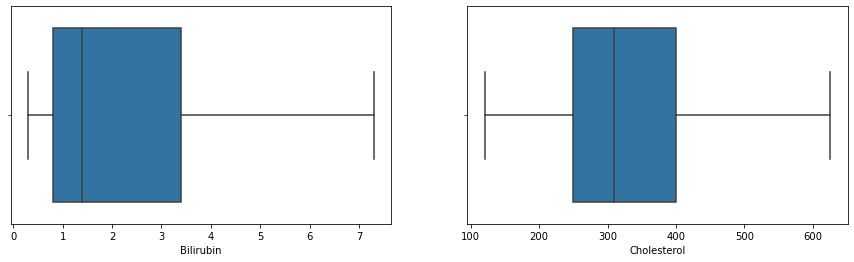

In [16]:
# after handling outliers
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.boxplot(df['Bilirubin'], data  = df)
plt.subplot(1,2,2) 
sns.boxplot(df['Cholesterol'], data  = df)
plt.show();

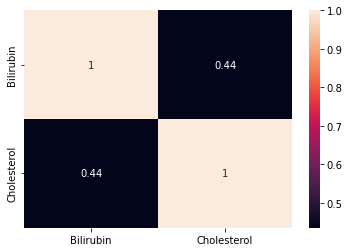

In [17]:
# Q2. C)
sns.heatmap(df[['Bilirubin', 'Cholesterol']].corr(), annot = True);

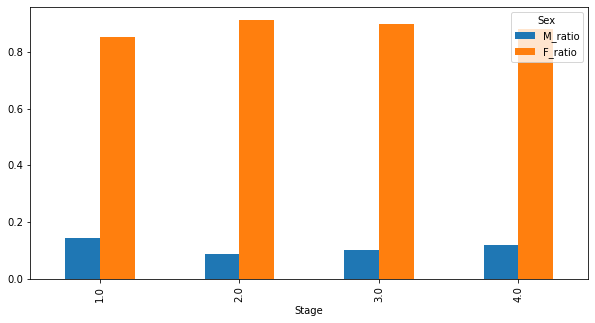

In [18]:
'''Q3. A) How does the ratio of males to females changes as we go down the severity stage of cirrhosis from 1 to 4?
comment for pattern. '''

table = pd.pivot_table(df, index  = 'Stage', columns = 'Sex', aggfunc = 'size', fill_value = 0)
table['M_ratio'] =  table['M']/table.sum(axis = 1)
table['F_ratio'] =  table['F']/table.sum(axis = 1)
table[['M_ratio','F_ratio']].plot(kind = 'bar',figsize  = (10,5));

<AxesSubplot:xlabel='Stage', ylabel='Tryglicerides'>

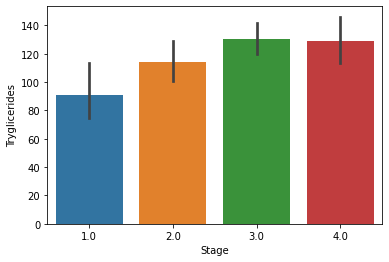

In [19]:
# Q3. B) Does the presence of triglycerides increase the stage severity of cirrhosis? Run a statistical test to prove the same.

sns.barplot(y = 'Tryglicerides', x = 'Stage', data = df)

In [22]:
df.drop('age_bin', axis = 1, inplace = True)

In [23]:
df.drop(['cholesterol', 'bilirubin', 'ID'], axis =1, inplace = True)


In [24]:
df['Status'].replace({'D': 0, 'C': 1, 'CL':2}, inplace = True)

In [26]:
temp = df['Status']
df.drop('Status', axis = 1, inplace = True)
df['status'] = temp

In [31]:

df.corr()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,status
N_Days,1.000000,-0.122775,-0.454524,-0.120450,0.430829,-0.364809,0.149269,-0.225492,-0.153000,0.151361,-0.111470,-0.366193,0.289630
Age,-0.122775,1.000000,-0.011902,-0.176963,-0.181417,0.060422,-0.044525,-0.149357,0.022302,-0.148340,0.113257,0.188797,-0.291425
Bilirubin,-0.454524,-0.011902,1.000000,0.435144,-0.331294,0.528115,0.114939,0.510872,0.398179,-0.041153,0.297360,0.273547,-0.359160
Cholesterol,-0.120450,-0.176963,0.435144,1.000000,-0.034159,0.147472,0.181292,0.353340,0.379874,0.245657,-0.110394,0.007760,-0.121912
Albumin,0.430829,-0.181417,-0.331294,-0.034159,1.000000,-0.264771,-0.101456,-0.220047,-0.103417,0.158659,-0.200592,-0.305296,0.210913
Copper,-0.364809,0.060422,0.528115,0.147472,-0.264771,1.000000,0.187357,0.293829,0.279852,-0.064403,0.218224,0.269400,-0.268088
Alk_Phos,0.149269,-0.044525,0.114939,0.181292,-0.101456,0.187357,1.000000,0.112217,0.180082,0.143733,0.089384,0.041273,-0.216608
SGOT,-0.225492,-0.149357,0.510872,0.353340,-0.220047,0.293829,0.112217,1.000000,0.126119,-0.120147,0.112174,0.164945,-0.219250
Tryglicerides,-0.153000,0.022302,0.398179,0.379874,-0.103417,0.279852,0.180082,0.126119,1.000000,0.103212,0.020122,0.123899,-0.148841
Platelets,0.151361,-0.148340,-0.041153,0.245657,0.158659,-0.064403,0.143733,-0.120147,0.103212,1.000000,-0.167331,-0.253523,0.153006


In [32]:
X = df[['N_Days', 'Age', 'Bilirubin', 'Copper', 'Prothrombin', 'Stage']]

In [33]:
X

,N_Days,Age,Bilirubin,Copper,Prothrombin,Stage
0,400,59.0,7.3,156.0,12.2,4.0
1,4500,56.0,1.1,54.0,10.6,3.0
2,1012,70.0,1.4,210.0,12.0,4.0
3,1925,55.0,1.8,64.0,10.3,4.0
4,1504,38.0,3.4,143.0,10.9,3.0
...,...,...,...,...,...,...
413,681,67.0,1.2,NaN,10.9,3.0
414,1103,39.0,0.9,NaN,11.2,4.0
415,1055,57.0,1.6,NaN,9.9,3.0
416,691,58.0,0.8,NaN,10.4,3.0


In [40]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan,strategy="mean")
si.fit(X)
X = si.transform(X)

In [41]:
X

array([[4.00000000e+02, 5.90000000e+01, 7.30000000e+00, 1.56000000e+02,
        1.22000000e+01, 4.00000000e+00],
       [4.50000000e+03, 5.60000000e+01, 1.10000000e+00, 5.40000000e+01,
        1.06000000e+01, 3.00000000e+00],
       [1.01200000e+03, 7.00000000e+01, 1.40000000e+00, 2.10000000e+02,
        1.20000000e+01, 4.00000000e+00],
       ...,
       [1.05500000e+03, 5.70000000e+01, 1.60000000e+00, 9.76483871e+01,
        9.90000000e+00, 3.00000000e+00],
       [6.91000000e+02, 5.80000000e+01, 8.00000000e-01, 9.76483871e+01,
        1.04000000e+01, 3.00000000e+00],
       [9.76000000e+02, 5.30000000e+01, 7.00000000e-01, 9.76483871e+01,
        1.06000000e+01, 4.00000000e+00]])

In [42]:
y = df['status']

In [50]:
"""from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [1, 3, 4, 5, 6, 7])], remainder="passthrough" )
X = np.array(ct.fit_transform(X))"""

'from sklearn.preprocessing import OneHotEncoder\nfrom sklearn.compose import ColumnTransformer\n\nct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [1, 3, 4, 5, 6, 7])], remainder="passthrough" )\nX = np.array(ct.fit_transform(X))'

In [44]:
X

array([[4.00000000e+02, 5.90000000e+01, 7.30000000e+00, 1.56000000e+02,
        1.22000000e+01, 4.00000000e+00],
       [4.50000000e+03, 5.60000000e+01, 1.10000000e+00, 5.40000000e+01,
        1.06000000e+01, 3.00000000e+00],
       [1.01200000e+03, 7.00000000e+01, 1.40000000e+00, 2.10000000e+02,
        1.20000000e+01, 4.00000000e+00],
       ...,
       [1.05500000e+03, 5.70000000e+01, 1.60000000e+00, 9.76483871e+01,
        9.90000000e+00, 3.00000000e+00],
       [6.91000000e+02, 5.80000000e+01, 8.00000000e-01, 9.76483871e+01,
        1.04000000e+01, 3.00000000e+00],
       [9.76000000e+02, 5.30000000e+01, 7.00000000e-01, 9.76483871e+01,
        1.06000000e+01, 4.00000000e+00]])

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

In [46]:
from xgboost import XGBClassifier
xg = XGBClassifier(eval_metric='mlogloss')
xg.fit(X_train, y_train)
y_predxg = xg.predict(X_test)

<AxesSubplot:xlabel='status', ylabel='Density'>

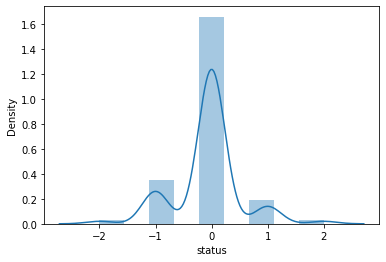

In [47]:
sns.distplot(y_test-y_predxg)

In [48]:
from sklearn.metrics import mean_absolute_error
a = cross_val_score(estimator=xg, X=X_train, y=y_train, cv =10)


In [49]:
print(f"XGBoost Mean Score : {mean_absolute_error(y_test, y_predxg)}")
print(f"XGBoost Accuracy : {a.mean()*100} %\n")

XGBoost Mean Score : 0.2857142857142857
XGBoost Accuracy : 74.83957219251337 %



In [170]:
y_predxg

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)